In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
from data.data_loading import load_data

project_root_dir = os.path.dirname(os.getcwd())
data_dirname = os.path.join(project_root_dir, 'challenge_data')
# read data
X_train, y_train, X_test = load_data(data_dirname)

X_train.columns

from strategy.strategy import *
from models.linreg import *
from scripts.cross_validation import *
from itertools import product

PP1 = Pipeline([MissingValuesMean(), DropIds()])
PP2 = Pipeline([MissingValuesLast(), DropIds()])

pipelines = [PP1, PP2]

ridge_pen = [10**(i/2) for i in range(-6, 10)]
ridge_models = [RidgeRegressionModel(alpha=alpha, name=f"RidgeReg_{alpha:0.3g}") for alpha in ridge_pen]

lasso_pen = [10**(i/2) for i in range(-14, -1)]
lasso_models = [LassoRegressionModel(alpha=alpha, name=f"LassoReg_{alpha:0.3g}") for alpha in lasso_pen]

models = [LinearRegressionModel()] + ridge_models + lasso_models

strategies = [Strategy(pipeline, model, name=f"strat{id_s}") for id_s, (pipeline, model) in enumerate(product(pipelines, models))]

CV = KFoldCrossValidation(strategies, k = 5)
CV.run(X_train, y_train.TARGET, verbose = False)

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.521e+02, tolerance: 1.185e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.339e+02, tolerance: 1.185e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.922e+00, tolerance: 1.250e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.861e+02, tolerance: 1.250e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.676e+02, tolerance: 1.262e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+02, tolerance: 1.262e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.199e+02, tolerance: 1.346e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.039e+02, tolerance: 1.346e-01
  model = cd_fast.enet_coordinate_descent(
/Users/nacimbouia/Documents/Travail/MVA-DataCh/ENS-Data-Challenge-Electricity-Prices-Forecast/.venv/lib/python3.9/site-package

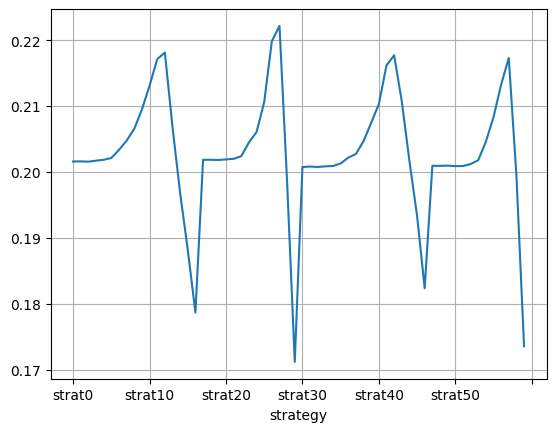

In [27]:
CV.scores.mean().plot()
plt.grid()

In [9]:
strategies[27]

Strategy:
---Pipeline(missing_values_mean, drop_ids, centered_reduced)
---LassoReg_0.01

In [10]:
CV.scores["strat27"]

fold_id
fold_0    0.290249
fold_1    0.186420
fold_2    0.198329
fold_3    0.234495
fold_4    0.181134
Name: strat27, dtype: float64

In [12]:
CV.scores.mean(1)

fold_id
fold_0    0.270656
fold_1    0.160978
fold_2    0.205598
fold_3    0.222031
fold_4    0.151154
dtype: float64

In [23]:
y_test = X_test[["ID"]]
y_test["TARGET"] = strategies[27].process(X_train, y_train.TARGET, X_test)
y_test.head()

/var/folders/3p/g7990tvs7sjd_z_w8jqby4700000gn/T/ipykernel_35541/1386134871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["TARGET"] = strategies[27].process(X_train, y_train.TARGET, X_test)


,ID,TARGET
0,1115,0.027307
1,1202,0.148487
2,1194,-0.199807
3,1084,0.109688
4,1135,0.041867


In [24]:
y_test.to_csv(os.path.join(data_dirname, "FastSub3.csv"), index=False)